Text(0, 0.5, 'passed')

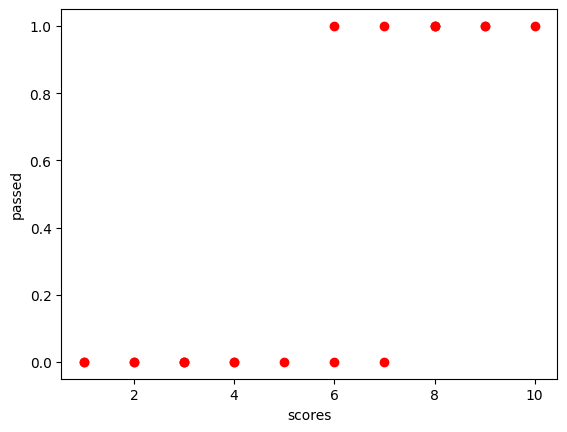

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

scores = [
    [1],
    [1],
    [2],
    [2],
    [3],
    [3],
    [3],
    [4],
    [4],
    [5],
    [6],
    [6],
    [7],
    [7],
    [8],
    [8],
    [8],
    [9],
    [9],
    [10],
]
passed = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]

plt.scatter(scores, passed, color="r")
plt.xlabel("scores")
plt.ylabel("passed")

In [3]:
# 尝试使用线性拟合
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(scores, passed)
model.coef_, model.intercept_

(array([0.1446863]), np.float64(-0.36683738796414833))

Text(0, 0.5, 'passed')

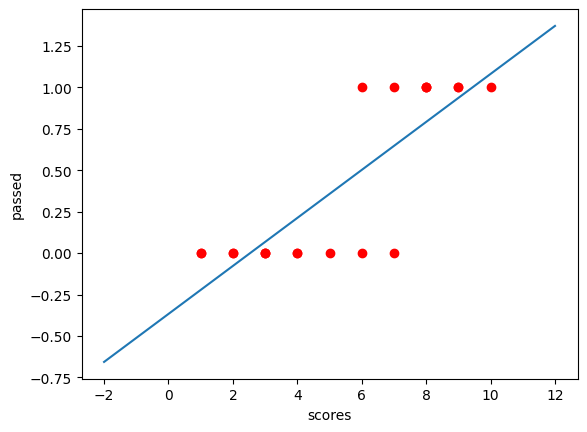

In [4]:
# 绘制直线到散点图中
import numpy as np

x = np.linspace(-2, 12, 100)

plt.plot(x, model.coef_[0] * x + model.intercept_)
plt.scatter(scores, passed, color="r")
plt.xlabel("scores")
plt.ylabel("passed")

Text(0, 0.5, 'y')

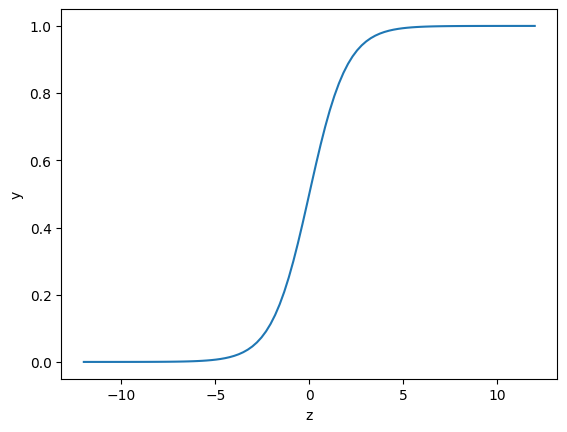

In [5]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

z = np.linspace(-12, 12, 100)  # 生成等间距 x 值方便绘图
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("y")

In [6]:
def loss(h, y):
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss

def gradient(X, h, y):
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient

In [7]:
# 读取数据集
import pandas as pd

df = pd.read_csv("course-8-data.csv", header=0,)  # 加载数据集
df.head()  # 预览前 5 行数据

,X0,X1,Y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


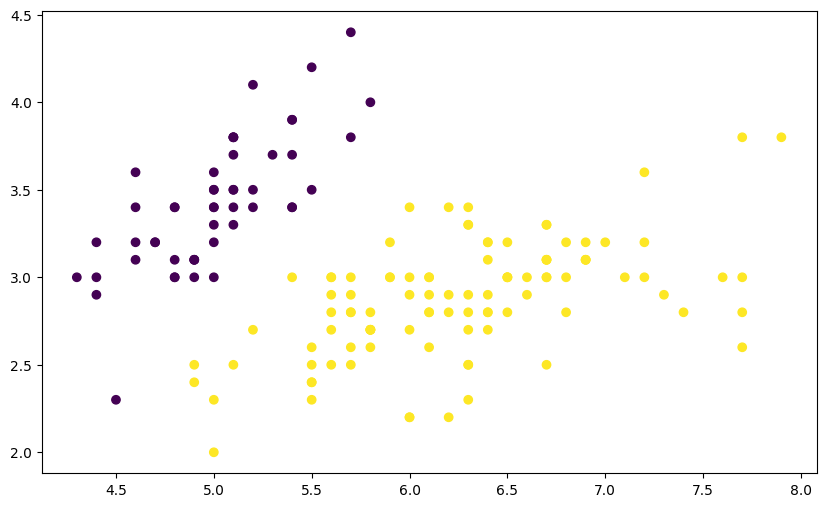

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

In [12]:
def Logistic_Regression(x, y, lr, num_iter):
    # 逻辑回归过程
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值

    return l, w  # 返回迭代后的梯度和参数

x = df[['X0', 'X1']].values
y = df['Y'].values
lr = 0.01
num_iter = 30000

L = Logistic_Regression(x, y, lr, num_iter)
L[1]

array([-1.47673791,  4.27250311, -6.9234085 ])

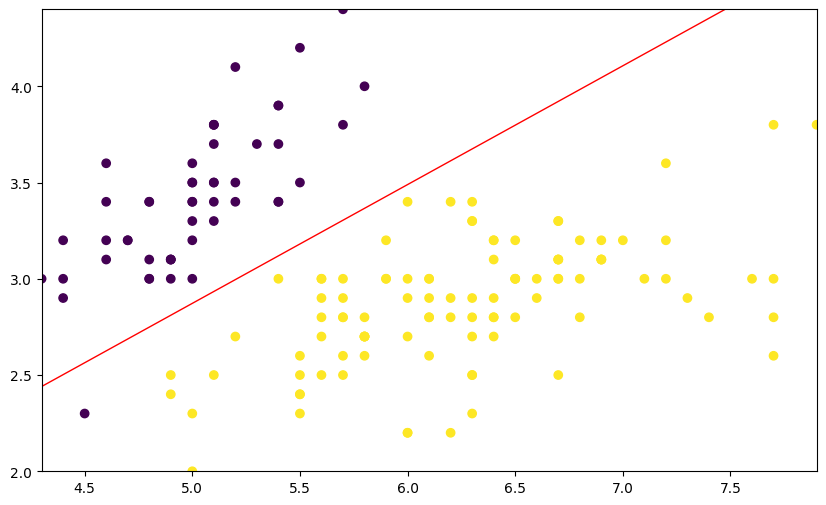

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = (
    df["X0"].min(),
    df["X0"].max(),
)
x2_min, x2_max = (
    df["X1"].min(),
    df["X1"].max(),
)

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[1][1:3]]).T) + L[1][0]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")

Text(0, 0.5, 'Loss function')

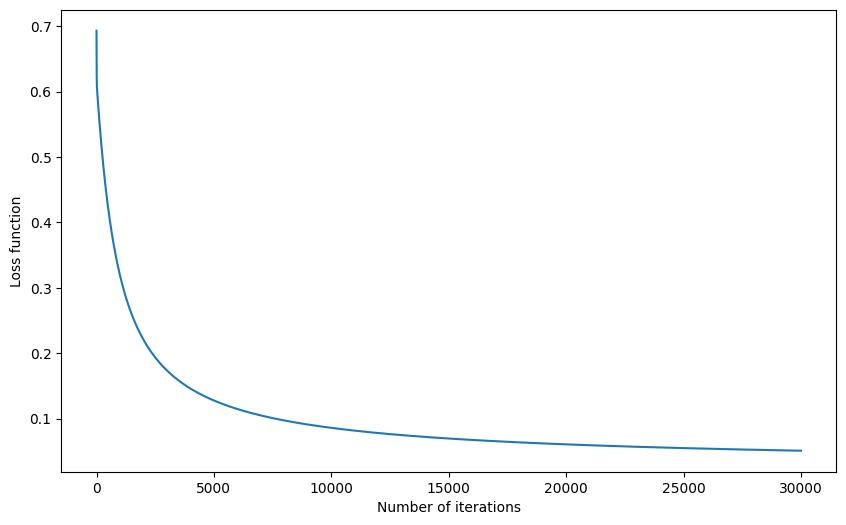

In [14]:
# 可视化的损失函数
def Logistic_Regression_(x, y, lr, num_iter):
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 1

    l_list = []  # 保存损失函数值
    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值
        l_list.append(l)

    return l_list


l_y = Logistic_Regression_(x, y, lr, num_iter)  # 训练

# 绘图
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(l_y))], l_y)
plt.xlabel("Number of iterations")
plt.ylabel("Loss function")

In [15]:
# 使用scikit-learn构建逻辑回归分类器
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    tol=0.001, max_iter=10000, solver="liblinear"
)  # 设置数据解算精度和迭代次数
model.fit(x, y)
model.coef_, model.intercept_

(array([[ 2.49579289, -4.01011301]]), array([-0.81713932]))

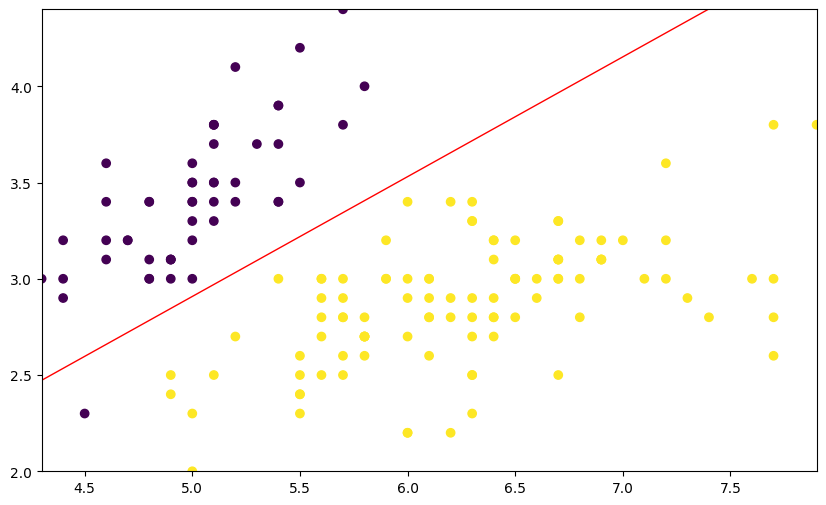

In [16]:
# 再次绘制图像
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = df["X0"].min(), df["X0"].max()
x2_min, x2_max = df["X1"].min(), df["X1"].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, model.coef_.T) + model.intercept_).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")